In [8]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

In [9]:
pwd

'/Users/ChrisD/Documents/UCBerkeleyMIDS/W207/Danicic_W207/w207_Facial-Keypoints-Detection/individual_code/Chris'

In [10]:
FTRAIN='/Users/ChrisD/Documents/UCBerkeleyMIDS/W207/Danicic_W207/w207_Facial-Keypoints-Detection/data/training.csv'

In [11]:
#from Tutorial
# Write function to load the data
# Normalize the target -- coordinates : current grid 96by96
# Normalize the features -- pixels : current range 255

def load(test = False, cols = None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN. 
    Pass a list of *cols* if you're only interested in a subset of the target columns"""
    
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) #Load pandas dataframe
    
    # The Image column has pixel values separated by space
    # convert these values to numpy arraus:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))
    
    if cols: # get a subset of columns
        df = df[list(cols) + ['Image']]
        
    print(df.count()) # prints the number of values for each column
    df = df.dropna() 
    # drop all rows that have missing values in them. reduce from 7049 partial to 2140 full examples
    
    # make feature matrix X
    # first convert pixel values from pandas 1D series to numpy 2D array
    # normalize pixel valuaes
    X = np.vstack(df['Image'].values)/255. # scale pixel values to [0,1]
    X = X.astype(np.float32) # make sure numeric val are float32
    # X is numpy.ndarray, shape (2140, 9216) == 7049 examples, 96 grid * 96 grid
    
    
    if not test: # only train data has target columns
        
        y = df[df.columns[:-1]].values #last column is X, we want the y targets here
        # y is numpy.ndarray, shape(2140, 30) -- 7049 examples, 30 targets each
        
        y = (y - 48) / 48 # scale target coordinates to [-1.1] (currently 96 by 96)
        X, y = shuffle(X, y, random_state = 42) #shuffle train data
        y = y.astype(np.float32)
        
    else:
        y = None # test data has no targets available
        
    return X,y

In [12]:
# Loading the data
X, y = load()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [13]:
def show_pic(X):
    # X is single face "Image" column in 9,216 long list
    # convert list to 96x96 array of numbers for visualizing
    
    #reshape
    arr=np.reshape(X,(96,96))
    #subplot used incase want to do 2x2 or somethin
    plt.subplot(1,1,1)
    plt.axis('off')
    
    #grayscale because why not
    plt.imshow(arr,cmap="gray")

In [14]:
#type(X[1])

X[1][1:3]*0.5

array([ 0.10980392,  0.17254902], dtype=float32)

### Simple scale dimming

In [18]:
def dimming(X,n):
    vals=copy.deepcopy(X)
    vals=vals*n
    return vals

0.815686


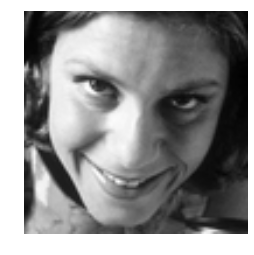

In [19]:
print(X[1][1000])
show_pic(X[1])

0.163137


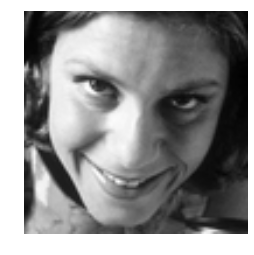

In [21]:
print(dimming(X[1],0.2)[1000])
show_pic(dimming(X[1],0.2))

*Note: it looks like nothing is happening because the image seems to autoscale to 1, but transform does occur*

### Washout

Rather than scaling down to zero (making things darker), we want to make everything lighter and thus closer to Xi=1

In [22]:
def washout(X,n):

    # 1-x because low x is darker , flip so white is minimum
    # (1-x)*(n<1) to move val to whiteness
    # 1-( (1-x)*(n<1) ) to get back to greyscale
    vals=1-(n*(1-X))
    return vals
    

pixel 1000 =  0.815686
0.0352941 is min pixel value


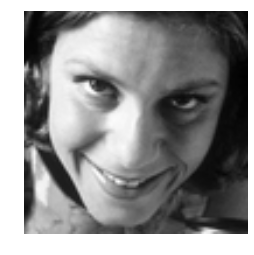

In [23]:
print('pixel 1000 = ',X[1][1000])
print(min(X[1]),'is min pixel value')
show_pic(X[1])

(array([ 474.,  606.,  720.,  598.,  523.,  616.,  621.,  605.,  639.,
         365.,  268.,  319.,  318.,  347.,  350.,  286.,  347.,  355.,
         657.,  202.]),
 array([ 0.03529412,  0.08352941,  0.13176471,  0.18      ,  0.2282353 ,
         0.27647059,  0.32470588,  0.37294118,  0.42117647,  0.46941177,
         0.51764706,  0.56588235,  0.61411765,  0.66235294,  0.71058824,
         0.75882353,  0.80705882,  0.85529412,  0.90352941,  0.95176471,  1.        ]),
 <a list of 20 Patch objects>)

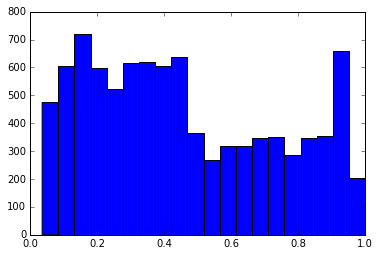

In [24]:
plt.hist(X[1],bins=20)

pixel 1000 =  0.907843
0.517647 is min pixel value


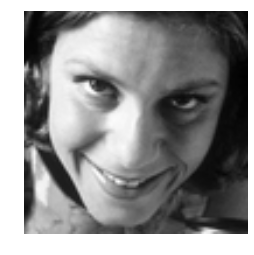

In [27]:
dim_2=washout(X[1],0.5)
print('pixel 1000 = ',dim_2[1000])
print(min(dim_2),'is min pixel value')
show_pic(dim_2)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,   754.,  1294.,  1166.,  1278.,  1178.,   566.,
          712.,   685.,   699.,   884.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

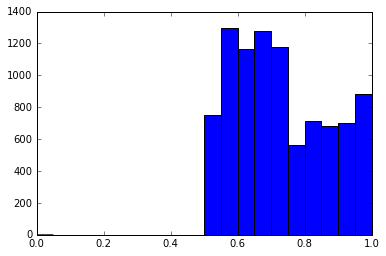

In [28]:
plt.hist(dim_2,bins=20,range=[0,1])


### Blur functions

#### blur range

blur range is general function will average each pixel with its neighbors in a square radius of n over given range
    
    (bc square is easier than approx circle)

- r=1 yields 3x3 area to average
- r=2 yields 5x5 area to average
- ...

In [29]:
def blur_range(X,r,i_range,j_range):
    if r>=0 and r<11:

        fig=copy.deepcopy(X)  # for protection

        horz_moves=range(-r,r+1) # all possible movements in i-direction (rows) from pixel
        vert_moves=range(-r,r+1) # same for j-direction (columns)
        
        horz_canvas=i_range
        vert_canvas=j_range

        Arr = np.reshape(fig,(96,96)) # creates np 96x96 array to work with

        for i in horz_canvas:  # scan X columns, stay in bounds, dont care about edges (sorry)
            for j in vert_canvas:  #scan Y rows, stay in bounds

                area=[]                        # blank list for area pixel vals
                for rows in horz_moves:        # row cycle 
                    for cols in vert_moves:      # col cycle
                        area.append(Arr[i+rows,j+cols])      #keep appending area list with vals
                Arr[i,j]=np.mean(area)   

        return np.ravel(Arr)

    else: 
        print('radius between 0 and 10')


#### blur radius

 blur_radius will average each pixel with its neighbors in a square radius of n over all picture (except border)
    
    (bc square is easier than approx circle)

- r=1 yields 3x3 area to average
- r=2 yields 5x5 area to average
- ...

In [30]:
def blur_radius(X,r):
    
    i_range=range(r,96-r) # scan X columns, stay in bounds, dont care about edges (sorry)
    j_range=range(r,96-r)#scan Y rows, stay in bounds
    
    return blur_range(X,r,i_range,j_range)
    
    
    

In [31]:
blur_2b=blur_radius(X[2],2)

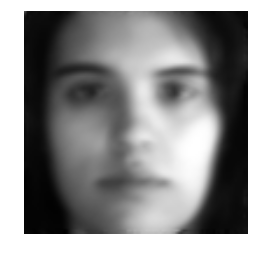

In [32]:
show_pic(blur_2b)

### blur quadrant

- nearly identical to blur_radius, but now quadrant of choice in list 

In [33]:
def blur_quadrant(X,r,L):
    
    Arr = copy.deepcopy(X)  # copy for data preservation
    
    
        
    # top left  
    # [0,0]  [48,0]
    # [0,48] [48,48]

    if 1 in L:
        x_range=range(r,48)  # range of x coordinates
        y_range=range(r,48)  # range of y coordinates

        Arr= blur_range(Arr,r,x_range,y_range)

    # bottom left  
    # [0,48]  [48,48]
    # [0,96] [48,96]
    if 2 in L:
        x_range=range(r,48)
        y_range=range(48,96-r)

        Arr= blur_range(Arr,r,x_range,y_range)
    
    # top right  
    # [48,0]  [96,0]
    # [48,48] [96,48]
    
    if 3 in L:
        x_range=range(48,96-r)
        y_range=range(r,48)

        Arr= blur_range(Arr,r,x_range,y_range)

    # bottom left  
    # [0,48]  [48,48]
    # [0,96] [48,96]
    if 3 in L:
        x_range=range(r,48)
        y_range=range(48,96-r)

        Arr= blur_range(Arr,r,x_range,y_range)

    #bottom right
    if 4 in L:
        x_range=range(48,96-r)
        y_range=range(48,96-r)

        Arr= blur_range(Arr,r,x_range,y_range)
            
    return np.ravel(Arr)

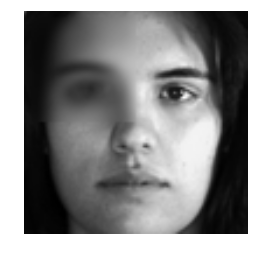

In [34]:
show_pic(blur_quadrant(X[2],3,[1]))

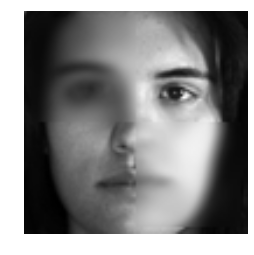

In [35]:
show_pic(blur_quadrant(X[2],3,[1,4]))

In [42]:
# Blur_rectangle(X,c=[48,48],y,x)

In [75]:
def blur_rectangle(X,r,c,y,x):
    # blurs rectangle having 2x width and 2y height
    # x is horizontal radius
    # y is vertical radius
    # c is list of [row,col] of center of rectangle
    # r is blurred pixel averaging radius
    
    Arr= copy.deepcopy(X)
    
    #bottom right
    
    if x<=c[0] and x<=96-c[0] and y<=c[1] and y<=96-c[1]:  #ensure we stay within bounds for movement
        x_range=range(c[0]-x,c[0]+x)
        y_range=range(c[1]-y,c[1]+y)

        Arr= blur_range(Arr,r,x_range,y_range)
            
    return np.ravel(Arr)
    

In [72]:
dummy=np.asmatrix(np.array([[1, 2], [3, 4]]))
print(dummy)
print(dummy[0,1])

[[1 2]
 [3 4]]
2


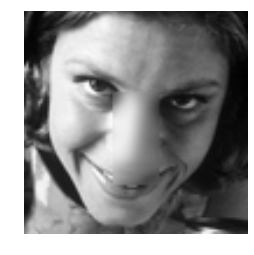

In [80]:
show_pic(blur_rectangle(X[1],3,[55,48],10,20))

In [85]:
def feature_to_pixel(n):
    row=int(n/96)  # over 96(or multiple), new line
    col=n%96       # how many remaining after divide by 96 pixels per row
    
    return [row,col]

In [90]:
print('[row=',int(115/96),', column=',115%96,']')

[row= 1 , column= 19 ]


In [86]:
feature_to_pixel(115)

[1, 19]